#### Import Libraries

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv('/Users/georgezambrano/Desktop/movies1.csv')

df

budget                                 company country  \
0      8000000           Columbia Pictures Corporation     USA   
1      6000000                      Paramount Pictures     USA   
2     15000000                      Paramount Pictures     USA   
3     18500000  Twentieth Century Fox Film Corporation     USA   
4      9000000                    Walt Disney Pictures     USA   
...        ...                                     ...     ...   
6815         0                Fox Searchlight Pictures      UK   
6816         0                Siempre Viva Productions     USA   
6817   3500000                  Warner Bros. Animation     USA   
6818         0                     Borderline Presents     USA   
6819         0               Les Productions du TrÈsor  France   

             director      genre      gross                            name  \
0          Rob Reiner  Adventure   52287414                     Stand by Me   
1         John Hughes     Comedy   70136369        Ferris Bueller's Day Off   
2          Tony Scott     Action  179800601                         Top Gun   
3       James Cameron     Action   85160248                          Aliens   
4      Randal Kleiser  Adventure   18564613         Flight of the Navigator   
...               ...        ...        ...                             ...   
6815  Mandie Fletcher     Comedy    4750497  Absolutely Fabulous: The Movie   
6816   Paul Duddridge      Drama      28368           Mothers and Daughters   
6817          Sam Liu  Animation    3775000        Batman: The Killing Joke   
6818    Nicolas Pesce      Drama      25981           The Eyes of My Mother   
6819    Nicole Garcia      Drama      37757       From the Land of the Moon   

     rating    released  runtime  score               star   votes  \
0         R  1986-08-22       89    8.1        Wil Wheaton  299174   
1     PG-13  1986-06-11      103    7.8  Matthew Broderick  264740   
2        PG  1986-05-16      110    6.9         Tom Cruise  236909   
3         R  1986-07-18      137    8.4   Sigourney Weaver  540152   
4        PG  1986-08-01       90    6.9        Joey Cramer   36636   
...     ...         ...      ...    ...                ...     ...   
6815      R  2016-07-22       91    5.4  Jennifer Saunders    9161   
6816  PG-13  2016-05-06       90    4.9        Selma Blair    1959   
6817      R  2016-07-25       76    6.5       Kevin Conroy   36333   
6818      R  2016-12-02       76    6.2     Kika Magalh„es    6947   
6819      R  2017-07-28      120    6.7   Marion Cotillard    2411   

                 writer  year  
0          Stephen King  1986  
1           John Hughes  1986  
2              Jim Cash  1986  
3         James Cameron  1986  
4         Mark H. Baker  1986  
...                 ...   ...  
6815  Jennifer Saunders  2016  
6816      Paige Cameron  2016  
6817    Brian Azzarello  2016  
6818      Nicolas Pesce  2016  
6819        Milena Agus  2016  

[6820 rows x 15 columns]

#### Check if there's any NaN

In [3]:
df.isnull().sum()


budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
votes       0
writer      0
year        0
dtype: int64

#### Column Data Typs

In [4]:
print(df.dtypes)

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object


In [49]:
df['Correct Year'] = df['released'].astype(str).str[:4]

df

budget                                 company country  \
0      8000000           Columbia Pictures Corporation     USA   
1      6000000                      Paramount Pictures     USA   
2     15000000                      Paramount Pictures     USA   
3     18500000  Twentieth Century Fox Film Corporation     USA   
4      9000000                    Walt Disney Pictures     USA   
...        ...                                     ...     ...   
6815         0                Fox Searchlight Pictures      UK   
6816         0                Siempre Viva Productions     USA   
6817   3500000                  Warner Bros. Animation     USA   
6818         0                     Borderline Presents     USA   
6819         0               Les Productions du TrÈsor  France   

             director      genre      gross                            name  \
0          Rob Reiner  Adventure   52287414                     Stand by Me   
1         John Hughes     Comedy   70136369        Ferris Bueller's Day Off   
2          Tony Scott     Action  179800601                         Top Gun   
3       James Cameron     Action   85160248                          Aliens   
4      Randal Kleiser  Adventure   18564613         Flight of the Navigator   
...               ...        ...        ...                             ...   
6815  Mandie Fletcher     Comedy    4750497  Absolutely Fabulous: The Movie   
6816   Paul Duddridge      Drama      28368           Mothers and Daughters   
6817          Sam Liu  Animation    3775000        Batman: The Killing Joke   
6818    Nicolas Pesce      Drama      25981           The Eyes of My Mother   
6819    Nicole Garcia      Drama      37757       From the Land of the Moon   

     rating    released  runtime  score               star   votes  \
0         R  1986-08-22       89    8.1        Wil Wheaton  299174   
1     PG-13  1986-06-11      103    7.8  Matthew Broderick  264740   
2        PG  1986-05-16      110    6.9         Tom Cruise  236909   
3         R  1986-07-18      137    8.4   Sigourney Weaver  540152   
4        PG  1986-08-01       90    6.9        Joey Cramer   36636   
...     ...         ...      ...    ...                ...     ...   
6815      R  2016-07-22       91    5.4  Jennifer Saunders    9161   
6816  PG-13  2016-05-06       90    4.9        Selma Blair    1959   
6817      R  2016-07-25       76    6.5       Kevin Conroy   36333   
6818      R  2016-12-02       76    6.2     Kika Magalh„es    6947   
6819      R  2017-07-28      120    6.7   Marion Cotillard    2411   

                 writer  year Correct Year  
0          Stephen King  1986         1986  
1           John Hughes  1986         1986  
2              Jim Cash  1986         1986  
3         James Cameron  1986         1986  
4         Mark H. Baker  1986         1986  
...                 ...   ...          ...  
6815  Jennifer Saunders  2016         2016  
6816      Paige Cameron  2016         2016  
6817    Brian Azzarello  2016         2016  
6818      Nicolas Pesce  2016         2016  
6819        Milena Agus  2016         2017  

[6820 rows x 16 columns]

In [56]:
pd.set_option('display.max_rows', None)

In [57]:
df.sort_values(by =['gross'], inplace = False, ascending = False)

budget                                            company  \
6380  245000000                                          Lucasfilm   
5061  237000000             Twentieth Century Fox Film Corporation   
2420  200000000             Twentieth Century Fox Film Corporation   
6391  150000000                                 Universal Pictures   
5723  220000000                                     Marvel Studios   
4840  185000000                                       Warner Bros.   
6614  200000000                                          Lucasfilm   
6687  200000000                            Pixar Animation Studios   
2870  115000000                                          Lucasfilm   
6398  250000000                                     Marvel Studios   
5720  250000000                                       Warner Bros.   
4001  150000000                                         DreamWorks   
5954  130000000                                        Color Force   
4404  225000000                               Walt Disney Pictures   
5309  200000000                               Walt Disney Pictures   
5959  200000000                                     Marvel Studios   
6624  250000000                                     Marvel Studios   
5722   78000000                                          Lionsgate   
3522  139000000                      Columbia Pictures Corporation   
1544   63000000                                 Universal Pictures   
5082  200000000                                         DreamWorks   
5943  150000000                      Walt Disney Animation Studios   
5500  125000000                                       Warner Bros.   
3750   94000000                            Pixar Animation Studios   
4195  113000000                                          Lucasfilm   
3743   94000000                                    New Line Cinema   
3997  200000000                      Columbia Pictures Corporation   
3987   30000000                                   Icon Productions   
6658   75000000                                 Universal Pictures   
5987   76000000                                 Universal Pictures   
6676  175000000                             Fairview Entertainment   
6616   58000000             Twentieth Century Fox Film Corporation   
6402  175000000                            Pixar Animation Studios   
6408  190000000                                 Universal Pictures   
5521  195000000                                 Paramount Pictures   
6184   58800000                                       Warner Bros.   
3530   94000000                                    New Line Cinema   
6630  150000000                               Walt Disney Pictures   
6197  125000000                                        Color Force   
4637  258000000                                  Columbia Pictures   
6442   74000000                         Illumination Entertainment   
5301  200000000                               Walt Disney Pictures   
6162  170000000                                     Marvel Studios   
6619  250000000                                       Warner Bros.   
1762   55000000                                 Paramount Pictures   
6603  175000000                                Atlas Entertainment   
4670  160000000                               DreamWorks Animation   
4620  150000000                                         DreamWorks   
4847  140000000                                 Paramount Pictures   
3300  125000000                                       Warner Bros.   
4870  185000000                                 Paramount Pictures   
3301   93000000                                    New Line Cinema   
1764   45000000                               Walt Disney Pictures   
5297  200000000                                 Paramount Pictures   
3541  115000000                                          Lucasfilm   
4631  300000000                               Walt Disney Pictures   
2205   75000000    

#### Are there any Outliers?

<AxesSubplot:>

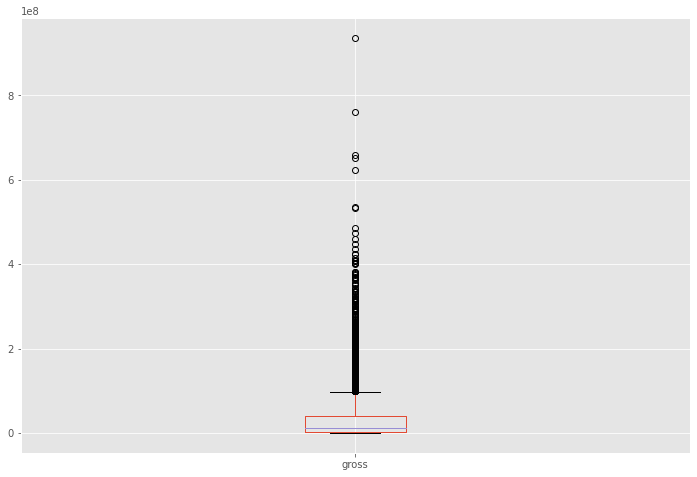

In [10]:
df.boxplot(column=['gross'])

#### budget vs gross

##### Scatter Plot

               

#### Regression Plot

<AxesSubplot:xlabel='budget', ylabel='gross'>

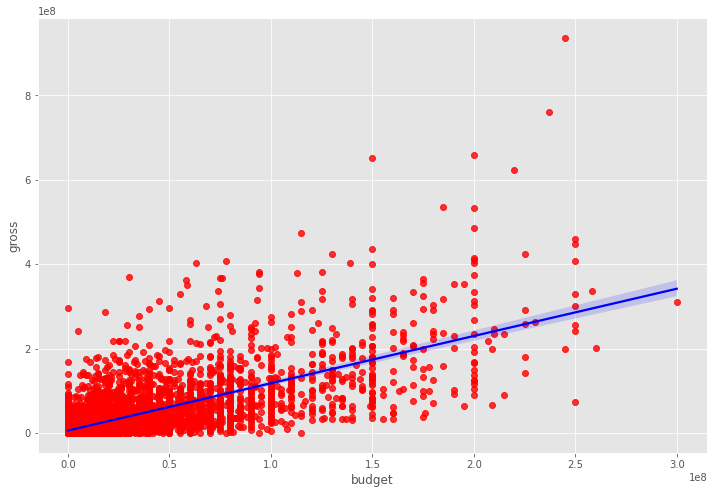

In [38]:
sns.regplot(x="budget", y="gross", data=df, scatter_kws = {"color": "red"}, line_kws = {"color": "blue"})

#### Correlations

In [39]:
df.corr(method ='pearson')

budget     gross   runtime     score     votes      year
budget   1.000000  0.712196  0.268226  0.042145  0.503924  0.291009
gross    0.712196  1.000000  0.224579  0.165693  0.662457  0.191548
runtime  0.268226  0.224579  1.000000  0.395343  0.317399  0.087639
score    0.042145  0.165693  0.395343  1.000000  0.393607  0.105276
votes    0.503924  0.662457  0.317399  0.393607  1.000000  0.229304
year     0.291009  0.191548  0.087639  0.105276  0.229304  1.000000

TypeError: 'str' object is not callable

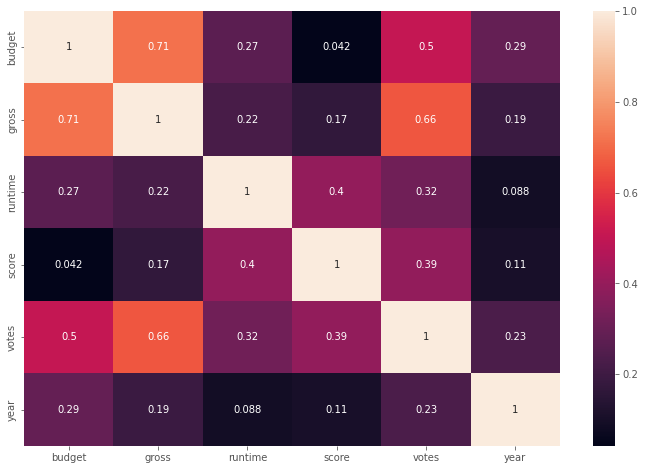

In [40]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [44]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes
        
df_numerized

budget  company  country  director  genre      gross  name  rating  \
0      8000000      665       54      2192      1   52287414  4661       8   
1      6000000     1680       54      1296      4   70136369  1821       7   
2     15000000     1680       54      2645      0  179800601  6203       6   
3     18500000     2062       54      1066      0   85160248   295       8   
4      9000000     2122       54      2123      1   18564613  1872       6   
...        ...      ...      ...       ...    ...        ...   ...     ...   
6815         0     1013       53      1623      4    4750497   230       8   
6816         0     1914       54      1989      6      28368  3430       7   
6817   3500000     2124       54      2313      2    3775000   577       8   
6818         0      415       54      1914      6      25981  5272       8   
6819         0     1393       16      1918      6      37757  1971       8   

      released  runtime  score  star   votes  writer  year  Correct Year  
0           46       89    8.1  2454  299174    3716  1986             1  
1           34      103    7.8  1605  264740    1970  1986             1  
2           30      110    6.9  2345  236909    1852  1986             1  
3           40      137    8.4  2192  540152    1629  1986             1  
4           43       90    6.9  1139   36636    2549  1986             1  
...        ...      ...    ...   ...     ...     ...   ...           ...  
6815      2335       91    5.4  1066    9161    1800  2016            31  
6816      2320       90    4.9  2146    1959    3008  2016            31  
6817      2336       76    6.5  1355   36333     450  2016            31  
6818      2361       76    6.2  1370    6947    2946  2016            31  
6819      2398      120    6.7  1558    2411    2831  2016            32  

[6820 rows x 16 columns]

In [51]:
df

budget                                 company country  \
0      8000000           Columbia Pictures Corporation     USA   
1      6000000                      Paramount Pictures     USA   
2     15000000                      Paramount Pictures     USA   
3     18500000  Twentieth Century Fox Film Corporation     USA   
4      9000000                    Walt Disney Pictures     USA   
...        ...                                     ...     ...   
6815         0                Fox Searchlight Pictures      UK   
6816         0                Siempre Viva Productions     USA   
6817   3500000                  Warner Bros. Animation     USA   
6818         0                     Borderline Presents     USA   
6819         0               Les Productions du TrÈsor  France   

             director      genre      gross                            name  \
0          Rob Reiner  Adventure   52287414                     Stand by Me   
1         John Hughes     Comedy   70136369        Ferris Bueller's Day Off   
2          Tony Scott     Action  179800601                         Top Gun   
3       James Cameron     Action   85160248                          Aliens   
4      Randal Kleiser  Adventure   18564613         Flight of the Navigator   
...               ...        ...        ...                             ...   
6815  Mandie Fletcher     Comedy    4750497  Absolutely Fabulous: The Movie   
6816   Paul Duddridge      Drama      28368           Mothers and Daughters   
6817          Sam Liu  Animation    3775000        Batman: The Killing Joke   
6818    Nicolas Pesce      Drama      25981           The Eyes of My Mother   
6819    Nicole Garcia      Drama      37757       From the Land of the Moon   

     rating    released  runtime  score               star   votes  \
0         R  1986-08-22       89    8.1        Wil Wheaton  299174   
1     PG-13  1986-06-11      103    7.8  Matthew Broderick  264740   
2        PG  1986-05-16      110    6.9         Tom Cruise  236909   
3         R  1986-07-18      137    8.4   Sigourney Weaver  540152   
4        PG  1986-08-01       90    6.9        Joey Cramer   36636   
...     ...         ...      ...    ...                ...     ...   
6815      R  2016-07-22       91    5.4  Jennifer Saunders    9161   
6816  PG-13  2016-05-06       90    4.9        Selma Blair    1959   
6817      R  2016-07-25       76    6.5       Kevin Conroy   36333   
6818      R  2016-12-02       76    6.2     Kika Magalh„es    6947   
6819      R  2017-07-28      120    6.7   Marion Cotillard    2411   

                 writer  year Correct Year  
0          Stephen King  1986         1986  
1           John Hughes  1986         1986  
2              Jim Cash  1986         1986  
3         James Cameron  1986         1986  
4         Mark H. Baker  1986         1986  
...                 ...   ...          ...  
6815  Jennifer Saunders  2016         2016  
6816      Paige Cameron  2016         2016  
6817    Brian Azzarello  2016         2016  
6818      Nicolas Pesce  2016         2016  
6819        Milena Agus  2016         2017  

[6820 rows x 16 columns]

TypeError: 'str' object is not callable

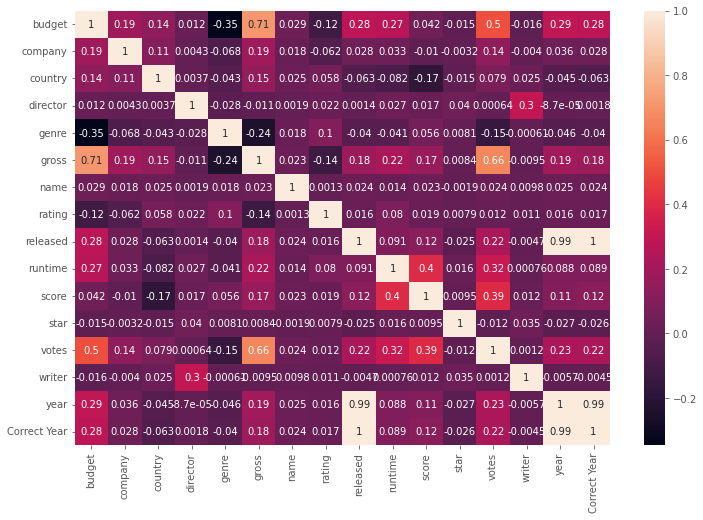

In [52]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [53]:
df_numerized.corr()

budget   company   country  director     genre     gross  \
budget        1.000000  0.187205  0.137635  0.011602 -0.346794  0.712196   
company       0.187205  1.000000  0.107950  0.004321 -0.068330  0.187220   
country       0.137635  0.107950  1.000000  0.003700 -0.042793  0.149988   
director      0.011602  0.004321  0.003700  1.000000 -0.027668 -0.011429   
genre        -0.346794 -0.068330 -0.042793 -0.027668  1.000000 -0.242676   
gross         0.712196  0.187220  0.149988 -0.011429 -0.242676  1.000000   
name          0.028712  0.018098  0.025020  0.001908  0.018062  0.022768   
rating       -0.119660 -0.062250  0.057979  0.021928  0.100960 -0.135538   
released      0.276998  0.028320 -0.062549  0.001375 -0.040083  0.179099   
runtime       0.268226  0.033058 -0.081796  0.026779 -0.041357  0.224579   
score         0.042145 -0.010426 -0.174414  0.017129  0.056234  0.165693   
star         -0.015062 -0.003160 -0.014570  0.039813  0.008139  0.008381   
votes         0.503924  0.138662  0.078657  0.000639 -0.150519  0.662457   
writer       -0.015611 -0.004031  0.024982  0.298996 -0.000608 -0.009455   
year          0.291009  0.036272 -0.045204 -0.000087 -0.046259  0.191548   
Correct Year  0.275256  0.028483 -0.062587  0.001788 -0.039955  0.177464   

                  name    rating  released   runtime     score      star  \
budget        0.028712 -0.119660  0.276998  0.268226  0.042145 -0.015062   
company       0.018098 -0.062250  0.028320  0.033058 -0.010426 -0.003160   
country       0.025020  0.057979 -0.062549 -0.081796 -0.174414 -0.014570   
director      0.001908  0.021928  0.001375  0.026779  0.017129  0.039813   
genre         0.018062  0.100960 -0.040083 -0.041357  0.056234  0.008139   
gross         0.022768 -0.135538  0.179099  0.224579  0.165693  0.008381   
name          1.000000  0.001288  0.024270  0.013942  0.023342 -0.001910   
rating        0.001288  1.000000  0.016361  0.079542  0.019271  0.007891   
released      0.024270  0.016361  1.000000  0.091487  0.119863 -0.025442   
runtime       0.013942  0.079542  0.091487  1.000000  0.395343  0.016020   
score         0.023342  0.019271  0.119863  0.395343  1.000000  0.009483   
star         -0.001910  0.007891 -0.025442  0.016020  0.009483  1.000000   
votes         0.023665  0.011678  0.222102  0.317399  0.393607 -0.011920   
writer        0.009822  0.010741 -0.004656  0.000759  0.012222  0.035379   
year          0.024624  0.016221  0.994994  0.087639  0.105276 -0.026682   
Correct Year  0.023594  0.017114  0.999387  0.088777  0.117943 -0.025942   

                 votes    writer      year  Correct Year  
budget        0.503924 -0.015611  0.291009      0.275256  
company       0.138662 -0.004031  0.036272      0.028483  
country       0.078657  0.024982 -0.045204     -0.062587  
director      0.000639  0.298996 -0.000087      0.001788  
genre        -0.150519 -0.000608 -0.046259     -0.039955  
gross         0.662457 -0.009455  0.191548      0.177464  
name          0.023665  0.009822  0.024624      0.023594  
rating        0.011678  0.010741  0.016221      0.017114  
released      0.222102 -0.004656  0.994994      0.999387  
runtime       0.317399  0.000759  0.087639      0.088777  
score         0.393607  0.012222  0.105276      0.117943  
star         -0.011920  0.035379 -0.026682     -0.025942  
votes         1.000000  0.001154  0.229304      0.221222  
writer        0.001154  1.000000 -0.005663     -0.004528  
year          0.229304 -0.005663  1.000000      0.994974  
Correct Year  0.221222 -0.004528  0.994974      1.000000

In [58]:
correlation_mat = df_numerized .corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

budget        budget          1.000000
              company         0.187205
              country         0.137635
              director        0.011602
              genre          -0.346794
              gross           0.712196
              name            0.028712
              rating         -0.119660
              released        0.276998
              runtime         0.268226
              score           0.042145
              star           -0.015062
              votes           0.503924
              writer         -0.015611
              year            0.291009
              Correct Year    0.275256
company       budget          0.187205
              company         1.000000
              country         0.107950
              director        0.004321
              genre          -0.068330
              gross           0.187220
              name            0.018098
              rating         -0.062250
              released        0.028320
              runtime    

In [59]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre         budget         -0.346794
budget        genre          -0.346794
gross         genre          -0.242676
genre         gross          -0.242676
score         country        -0.174414
country       score          -0.174414
genre         votes          -0.150519
votes         genre          -0.150519
rating        gross          -0.135538
gross         rating         -0.135538
budget        rating         -0.119660
rating        budget         -0.119660
runtime       country        -0.081796
country       runtime        -0.081796
company       genre          -0.068330
genre         company        -0.068330
country       Correct Year   -0.062587
Correct Year  country        -0.062587
released      country        -0.062549
country       released       -0.062549
rating        company        -0.062250
company       rating         -0.062250
genre         year           -0.046259
year          genre          -0.046259
              country        -0.045204
country       year       

In [60]:
high_corr = [(sorted_pairs) > .5]

high_corr

[genre         budget          False
 budget        genre           False
 gross         genre           False
 genre         gross           False
 score         country         False
 country       score           False
 genre         votes           False
 votes         genre           False
 rating        gross           False
 gross         rating          False
 budget        rating          False
 rating        budget          False
 runtime       country         False
 country       runtime         False
 company       genre           False
 genre         company         False
 country       Correct Year    False
 Correct Year  country         False
 released      country         False
 country       released        False
 rating        company         False
 company       rating          False
 genre         year            False
 year          genre           False
               country         False
 country       year            False
 genre         country         False
 